# **Proyecto de IA**
## **contexto**




Cada año salen miles de video juegos, solo en Steam en el 2022 se contaron 10963 juegos nuevos.

¿Pero cuantos de estos jugamos?

¿Cuántos llegamos a conocer siquiera?

He aquí la pregunta: ¿Que hace el éxito de un juego, podemos predecir su éxito a partir de sus características?



## **Business analysis**




En este caso, podemos que los desarrolladores de juegos se hacen la misma pregunta, dado que es obvio que quieren saber si su producto será un éxito o un fracaso antes de que este llegue al público, así que llegamos a la pregunta:

¿Pueden las características de un video juego determinar si este será un éxito o fracaso antes de su lanzamiento?



## **Datos**

Los datos que tenemos tienen las siguientes columnas:

1.   Name: el nombre del juego
2.   Publisher: publicador del juego
3.   Vgchartz_score: Puntaje dado por la página vgchartz (mayor es mejor)
4.   Critic_score: puntaje dado por críticos (mayor es mejor)
5.   User_score: puntaje dado por jugadores (mayor es mejor)
6.   Total_shipped: copias físicas vendidas (en millones)
7.   Total_sales: ventas totales (en millones)
8.   Realease_date: Fecha en la que se lanzó el juego
9.   Genre: género del juego
10.  Img_url: link a la imagen de la portada del juego 

importación de librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

##Permisos de google drive para importación desde google collab

In [38]:
from google.colab import drive
drive.mount('/gdrive')

ModuleNotFoundError: No module named 'google'

## Importación de datos de forma local

In [50]:
df = pd.read_csv('./finalData.csv',na_values='?')

In [ ]:
df = pd.read_csv('/gdrive/MyDrive/Colab Notebooks/finaldata.csv',    #Ruta completa a la ubicación del archivo de interés.  
                 na_values='?') 

In [ ]:
from google.colab import files
uploaded = files.upload()

# Observaciones iniciales

Datos iniciales

In [3]:
df.head()

,name,publisher,vgchartz_score,critic_score,user_score,total_shipped,total_sales,release_date,genre,img_url
0,Legend of Dynamic Goushouden: Houkai no Rondo,Banpresto,7.310415,7.228117,8.086988,5.066328,0.340568,2003-10-24,Role-Playing,https://www.vgchartz.com/games/boxart/full_971...
1,Bundesliga Manager Professional,Software 2000,7.310415,7.228117,8.086988,5.066328,0.340568,1991-01-01,Simulation,https://www.vgchartz.com/games/boxart/1457370c...
2,Luxor,Activision,7.310415,7.228117,8.086988,5.066328,0.340568,2005-03-17,Puzzle,https://www.vgchartz.com/games/boxart/full_747...
3,Sokukoku no Kusabi: Hiiro no Kakera 3 Portable,Idea Factory,7.310415,7.228117,8.086988,5.066328,0.030000,2010-04-15,Adventure,https://www.vgchartz.com/games/boxart/full_476...
4,Vampire Rain: Altered Species,Ignition Entertainment,7.310415,3.500000,8.086988,5.066328,0.060000,2008-09-02,Action,https://www.vgchartz.com/games/boxart/full_824...


Observación de datos, verificamos que no tengamos nulos, y observamos el tipo de las columnas

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37715 entries, 0 to 37714
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            37715 non-null  object 
 1   publisher       37715 non-null  object 
 2   vgchartz_score  37715 non-null  float64
 3   critic_score    37715 non-null  float64
 4   user_score      37715 non-null  float64
 5   total_shipped   37715 non-null  float64
 6   total_sales     37715 non-null  float64
 7   release_date    37715 non-null  object 
 8   genre           37715 non-null  object 
 9   img_url         37715 non-null  object 
dtypes: float64(5), object(5)
memory usage: 2.9+ MB


## Observación de columnas y filas.

Tenemos 37715 filas y 10 columnas

In [5]:
df.shape

(37715, 10)

Observaciones iniciales de los promedios y cuartiles de nuestras variables numéricas

In [6]:
df.describe()


,vgchartz_score,critic_score,user_score,total_shipped,total_sales
count,37715.000000,37715.000000,37715.000000,37715.000000,37715.000000
mean,7.310415,7.228118,8.086988,5.066328,0.340568
std,0.292301,0.471288,0.134631,5.937960,0.463452
min,1.100000,1.000000,1.000000,0.000000,0.000000
25%,7.310415,7.228117,8.086988,5.066328,0.320000
50%,7.310415,7.228117,8.086988,5.066328,0.340568
75%,7.310415,7.228117,8.086988,5.066328,0.340568
max,9.700000,10.000000,10.000000,496.400000,20.320000


# Limpieza de datos

Eliminamos la columna de la imagen del juego, dado que no nos será útil

In [7]:
df=df.drop(['img_url'], axis=1) 

## Observación de ventas

Dado que tenemos dos tipos de ventas, queremos ver cuál es su diferencia

Lo que observamos es que, una son las ventas físicas (total_shipped) y las otras las ventas totales del juego (total_sales). 

Además, también observamos que la mayoría de total_shipped tiene un valor de 5.066328, esto es el promedio de todas las ventas, es decir, inicialmente este valor era nulo, y se le dio el promedio de esta columna. Lo mismo pasa con total_sales con el valor de 0.340568.

Ahora, aquí nos encontramos un problema, dado que a veces, el valor de ventas físicas vendidas es mayor al total de ventas, lo cual no tiene sentido, por ende, decidimos crear una nueva columna llamada "sales" que contenga el mayor valor que entre "total_sales" y "total_shipped" y este lo tomaremos como nuestro nuevo target

In [8]:
df[['total_sales','total_shipped']]

,total_sales,total_shipped
0,0.340568,5.066328
1,0.340568,5.066328
2,0.340568,5.066328
3,0.030000,5.066328
4,0.060000,5.066328
...,...,...
37710,0.120000,5.066328
37711,0.030000,5.066328
37712,0.170000,5.066328
37713,0.340568,0.010000


En este método se encuentra que columna tiene el mayor valor. 

In [51]:
def get_sales(df):
  sales=0
  if(df['total_sales']!=0.340568 and df['total_shipped']!=5.066328 and df['total_sales']>df['total_shipped'] and df['total_sales']!=0.0):
    sales=df['total_sales']
  elif(df['total_shipped']!=5.066328 and df['total_sales']!=0.340568 and df['total_shipped']>df['total_sales']and df['total_shipped']!=0.0):
    sales=df['total_shipped']
  else:
    i = random.randint(0,1)
    if(i==1):
      sales=df['total_shipped']
    else:
      sales=df['total_sales']
  return sales

In [17]:
def get_sales(df):
  sales=0
  if(df['total_sales']!=0.340568 and df['total_shipped']!=5.066328 and df['total_sales']>df['total_shipped']):
    sales=df['total_sales']
  elif(df['total_shipped']!=5.066328 and df['total_shipped']!=5.066328 and df['total_shipped']>df['total_sales']):
    sales=df['total_shipped']
  else:
    sales=df['total_sales']

  return sales

añadimos la nueva columna al df

In [52]:
df['sales']=df.apply(get_sales, axis = 1)

se verifica que la columna se añadió correctamente

In [11]:
df[['sales']]

,sales
0,0.340568
1,0.340568
2,0.340568
3,0.030000
4,0.060000
...,...
37710,5.066328
37711,0.030000
37712,5.066328
37713,0.340568


Para verificar que todo esté bien miramos los mayores datos, dado que sabemos que tetris tiene las mayores ventas nos aseguramos de que este siga siendo el caso

In [128]:
df['sales'].nlargest(5)

1888     496.40
35342    452.94
19558    400.00
30164    394.96
36364    325.00
Name: sales, dtype: float64

In [56]:
df['name'].get(1888)

'Tetris'

In [129]:
df['sales'].value_counts()

5.066328     17458
0.340568     11892
0.010000       473
0.020000       470
0.000000       461
             ...  
2.910000         1
9.120000         1
16.400000        1
9.350000         1
7.390000         1
Name: sales, Length: 738, dtype: int64

In [130]:
dfTest=df[df.sales != 0.0]

In [133]:
dfTest['sales'].value_counts()

0.340568      11892
0.010000        473
0.020000        470
0.030000        343
0.040000        248
              ...  
169.820000        1
5.540000          1
3.650000          1
3.450000          1
7.390000          1
Name: sales, Length: 736, dtype: int64

In [135]:
dfTest=dfTest[dfTest.sales!=5.066328]



In [139]:
dfTest=dfTest[dfTest.sales!=0.340568]

In [140]:
dfTest['sales'].value_counts()

0.340568      11892
0.010000        473
0.020000        470
0.030000        343
0.040000        248
              ...  
169.820000        1
5.540000          1
3.650000          1
3.450000          1
7.390000          1
Name: sales, Length: 736, dtype: int64

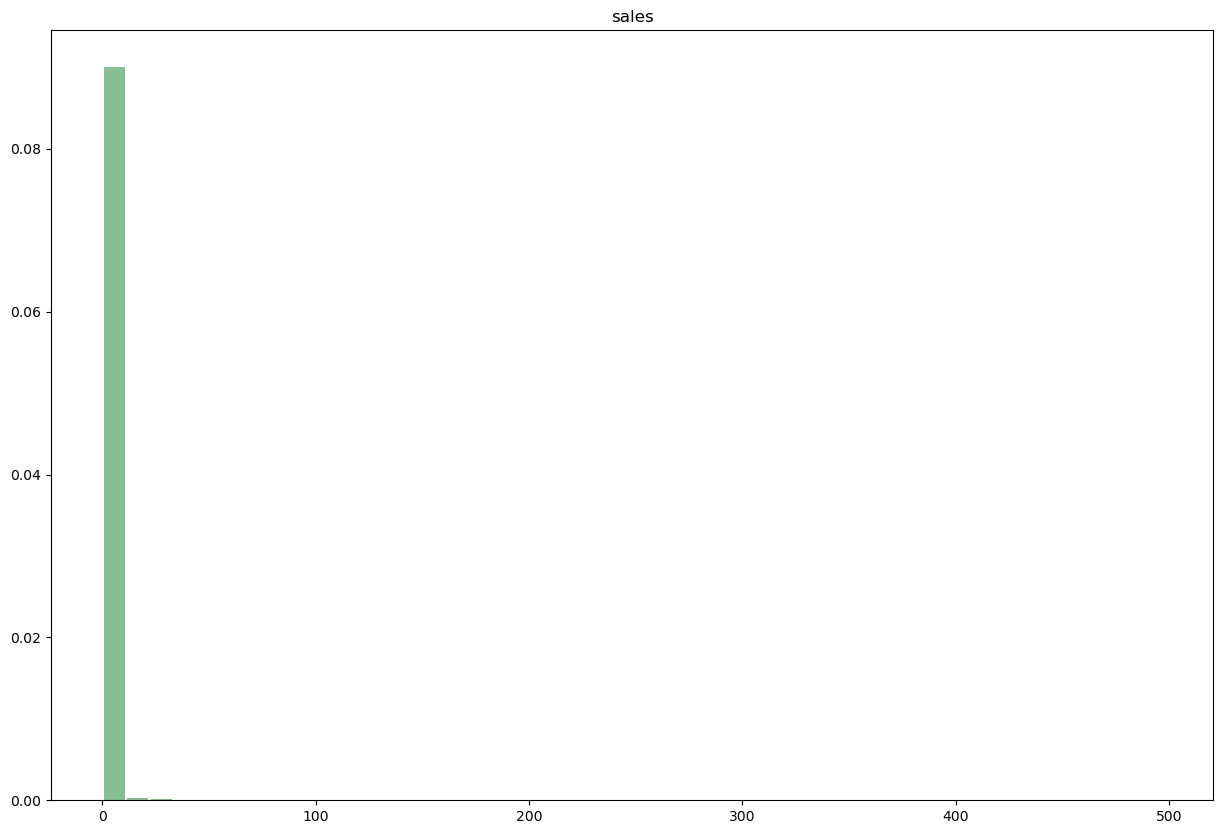

In [142]:
df.hist(column='sales', bins=45, grid=False, figsize=(15,10), color='#86bf91', zorder=2, rwidth=0.9, density=True)

plt.show()

In [120]:
37715-((17458+11892+462))

7903

## Fechas de lanzamiento

Dado que tenemos demasiadas fechas únicas (7192) de lanzamiento, decidimos que sería mejor pasar esta fecha a solo el año. 

In [58]:
df['release_date'].value_counts()

1994-01-01    313
1993-01-01    267
1992-01-01    246
1995-01-01    204
1983-01-01    200
             ... 
1995-03-30      1
1989-12-14      1
2014-11-10      1
1996-11-27      1
1993-07-09      1
Name: release_date, Length: 7192, dtype: int64

Creamos un arreglo que solo tenga los años de lanzamiento

In [59]:
only_year = np.array(df['release_date'])
i=0
while len(only_year) >i:
  only_year[i]=only_year[i].split("-",1)[0]
  i=1+i
only_year = only_year.astype('int16')

Creamos la nueva columna

In [60]:
df['year']=only_year

Verificamos los datos observando los datos únicos y cuantas veces aparecen

In [61]:
df['year'].value_counts()

2009    3115
2010    2472
2011    2325
2008    2041
2014    1742
2007    1658
2006    1444
2005    1227
2002    1218
2000    1211
2001    1178
2003    1172
2004    1117
2013    1040
1999    1020
2012    1011
1998     877
2017     864
2018     861
2015     860
1996     856
1995     796
1994     792
1997     761
2016     709
1993     684
2020     661
1992     624
2019     588
1991     538
1990     498
1989     312
1983     222
1988     198
1987     188
1982     178
2021     177
1986     125
2022      67
1984      60
1985      55
2070      45
1981      40
1978      38
1980      29
1977      10
1979       8
1975       1
2023       1
1973       1
Name: year, dtype: int64

Observamos el nuevo DF

In [62]:
df.head()

,name,publisher,vgchartz_score,critic_score,user_score,total_shipped,total_sales,release_date,genre,img_url,sales,year
0,Legend of Dynamic Goushouden: Houkai no Rondo,Banpresto,7.310415,7.228117,8.086988,5.066328,0.340568,2003-10-24,Role-Playing,https://www.vgchartz.com/games/boxart/full_971...,5.066328,2003
1,Bundesliga Manager Professional,Software 2000,7.310415,7.228117,8.086988,5.066328,0.340568,1991-01-01,Simulation,https://www.vgchartz.com/games/boxart/1457370c...,0.340568,1991
2,Luxor,Activision,7.310415,7.228117,8.086988,5.066328,0.340568,2005-03-17,Puzzle,https://www.vgchartz.com/games/boxart/full_747...,0.340568,2005
3,Sokukoku no Kusabi: Hiiro no Kakera 3 Portable,Idea Factory,7.310415,7.228117,8.086988,5.066328,0.030000,2010-04-15,Adventure,https://www.vgchartz.com/games/boxart/full_476...,0.030000,2010
4,Vampire Rain: Altered Species,Ignition Entertainment,7.310415,3.500000,8.086988,5.066328,0.060000,2008-09-02,Action,https://www.vgchartz.com/games/boxart/full_824...,0.060000,2008


Observamos si la columna genre para saber si modificar la creación de dummies o no

En este caso, dado que no hay muchas, haremos los dummies sin ningún tipo de filtro

In [63]:
df['genre'].value_counts()

Misc                6542
Action              4998
Adventure           3846
Role-Playing        3409
Sports              3137
Shooter             2860
Strategy            2486
Puzzle              2250
Simulation          2100
Platform            1870
Racing              1802
Fighting            1326
Action-Adventure     532
Visual Novel         260
Music                134
Party                 70
MMO                   53
Board Game            19
Education             17
Sandbox                4
Name: genre, dtype: int64

En este caso, tenemos demasiados publishers, así que haremos un filtro

In [64]:
df['publisher'].value_counts()

Unknown            1482
Sega               1409
Microsoft          1223
Nintendo           1185
Konami             1153
                   ... 
Game-Labs             1
Ray Corporation       1
Execution Labs        1
thesetales            1
1C Maddox Games       1
Name: publisher, Length: 3231, dtype: int64

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37715 entries, 0 to 37714
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            37715 non-null  object 
 1   publisher       37715 non-null  object 
 2   vgchartz_score  37715 non-null  float64
 3   critic_score    37715 non-null  float64
 4   user_score      37715 non-null  float64
 5   total_shipped   37715 non-null  float64
 6   total_sales     37715 non-null  float64
 7   release_date    37715 non-null  object 
 8   genre           37715 non-null  object 
 9   img_url         37715 non-null  object 
 10  sales           37715 non-null  float64
 11  year            37715 non-null  int16  
dtypes: float64(6), int16(1), object(5)
memory usage: 3.2+ MB


borramos todas las columnas que no vamos a usar

In [66]:
df = df.drop(['release_date'], axis=1) 
df = df.drop(['total_sales'], axis=1) 
df =df.drop(['total_shipped'], axis=1) 

## Valores atípicos

Se buscarán valores a típicos en año, dado que algunos valores pueden no tener sentido, por ejemplo, un juego que se publicó en el futuro

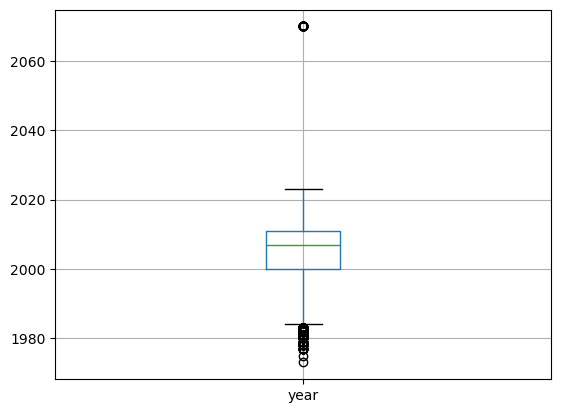

In [67]:
b_plot=df.boxplot(column='year') 
b_plot.plot()
plt.show()

Encontramos valores en años futuros, vamos a buscar cuantos de estos valores hay para tomar una decisión

In [68]:
df['year'].nlargest(10)


372     2070
2464    2070
3316    2070
3578    2070
3659    2070
4651    2070
5223    2070
5433    2070
6580    2070
6730    2070
Name: year, dtype: int16

Encontramos cuantos valores atípicos tenemos

In [69]:
df['year'].value_counts()[2070]

45

Dado que son 45 de 37715 datos, entonces vamos a borrar estos datos

In [70]:
df=df[df['year'] < 2070]

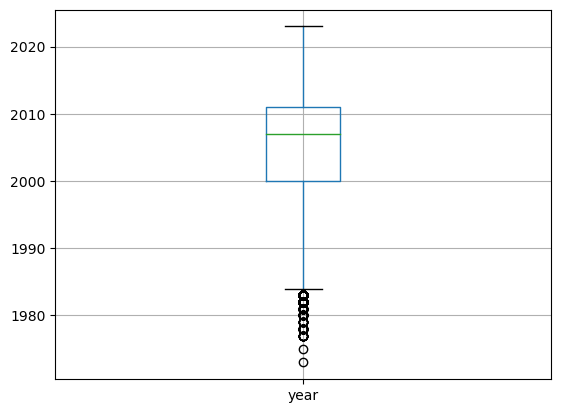

In [71]:
b_plot=df.boxplot(column='year') 
b_plot.plot()
plt.show()

Aún tenemos datos atípicos, pero tienen sentido a diferencia de datos en el futuro

Buscamos valores atípicos en sales

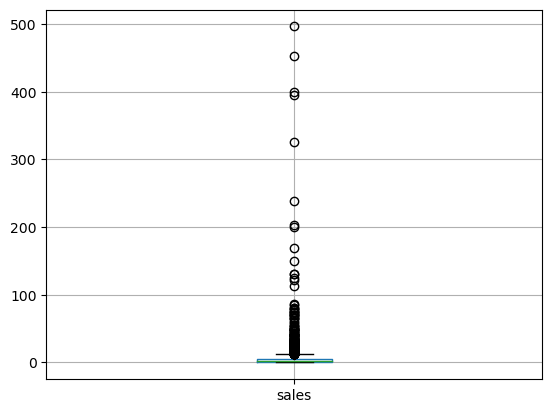

In [72]:
b_plot=df.boxplot(column='sales') 
b_plot.plot()
plt.show()

In [73]:
df['sales'].value_counts()

5.066328     17458
0.340568     11892
0.010000       473
0.020000       470
0.000000       461
             ...  
2.910000         1
9.120000         1
16.400000        1
9.350000         1
7.390000         1
Name: sales, Length: 738, dtype: int64

Aunque no lo parezca, los valores tienen sentido, siendo el max Tetris, el juego más vendido en esta lista

Dicho esto, el promedio también tiene sentido, dado que es el promedio de ventas físicas, que al ser mayor al promedio a ventas totales fue el que escogimos

# Creación de df con dummies

In [74]:
dfWithDummiesGen =  pd.concat([df, pd.get_dummies(df['genre'])], axis=1)
dfWithDummiesPubli=pd.concat([df, pd.get_dummies(df['publisher'])], axis=1)

## Heat map del df

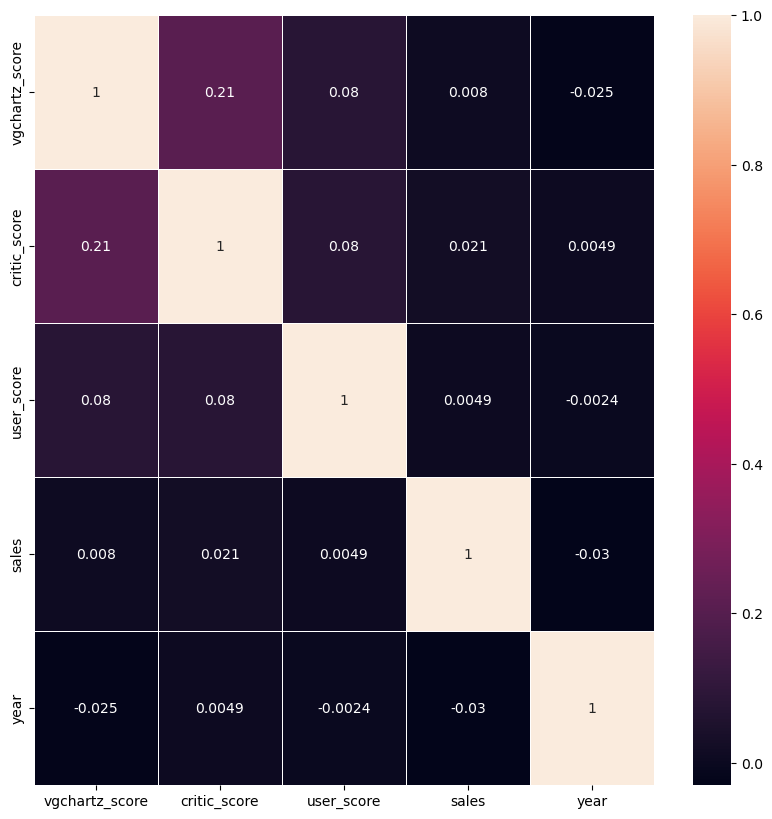

In [85]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(),annot=True,linewidths=.5)
plt.show()

## Heat map del DF con dummies de genero 

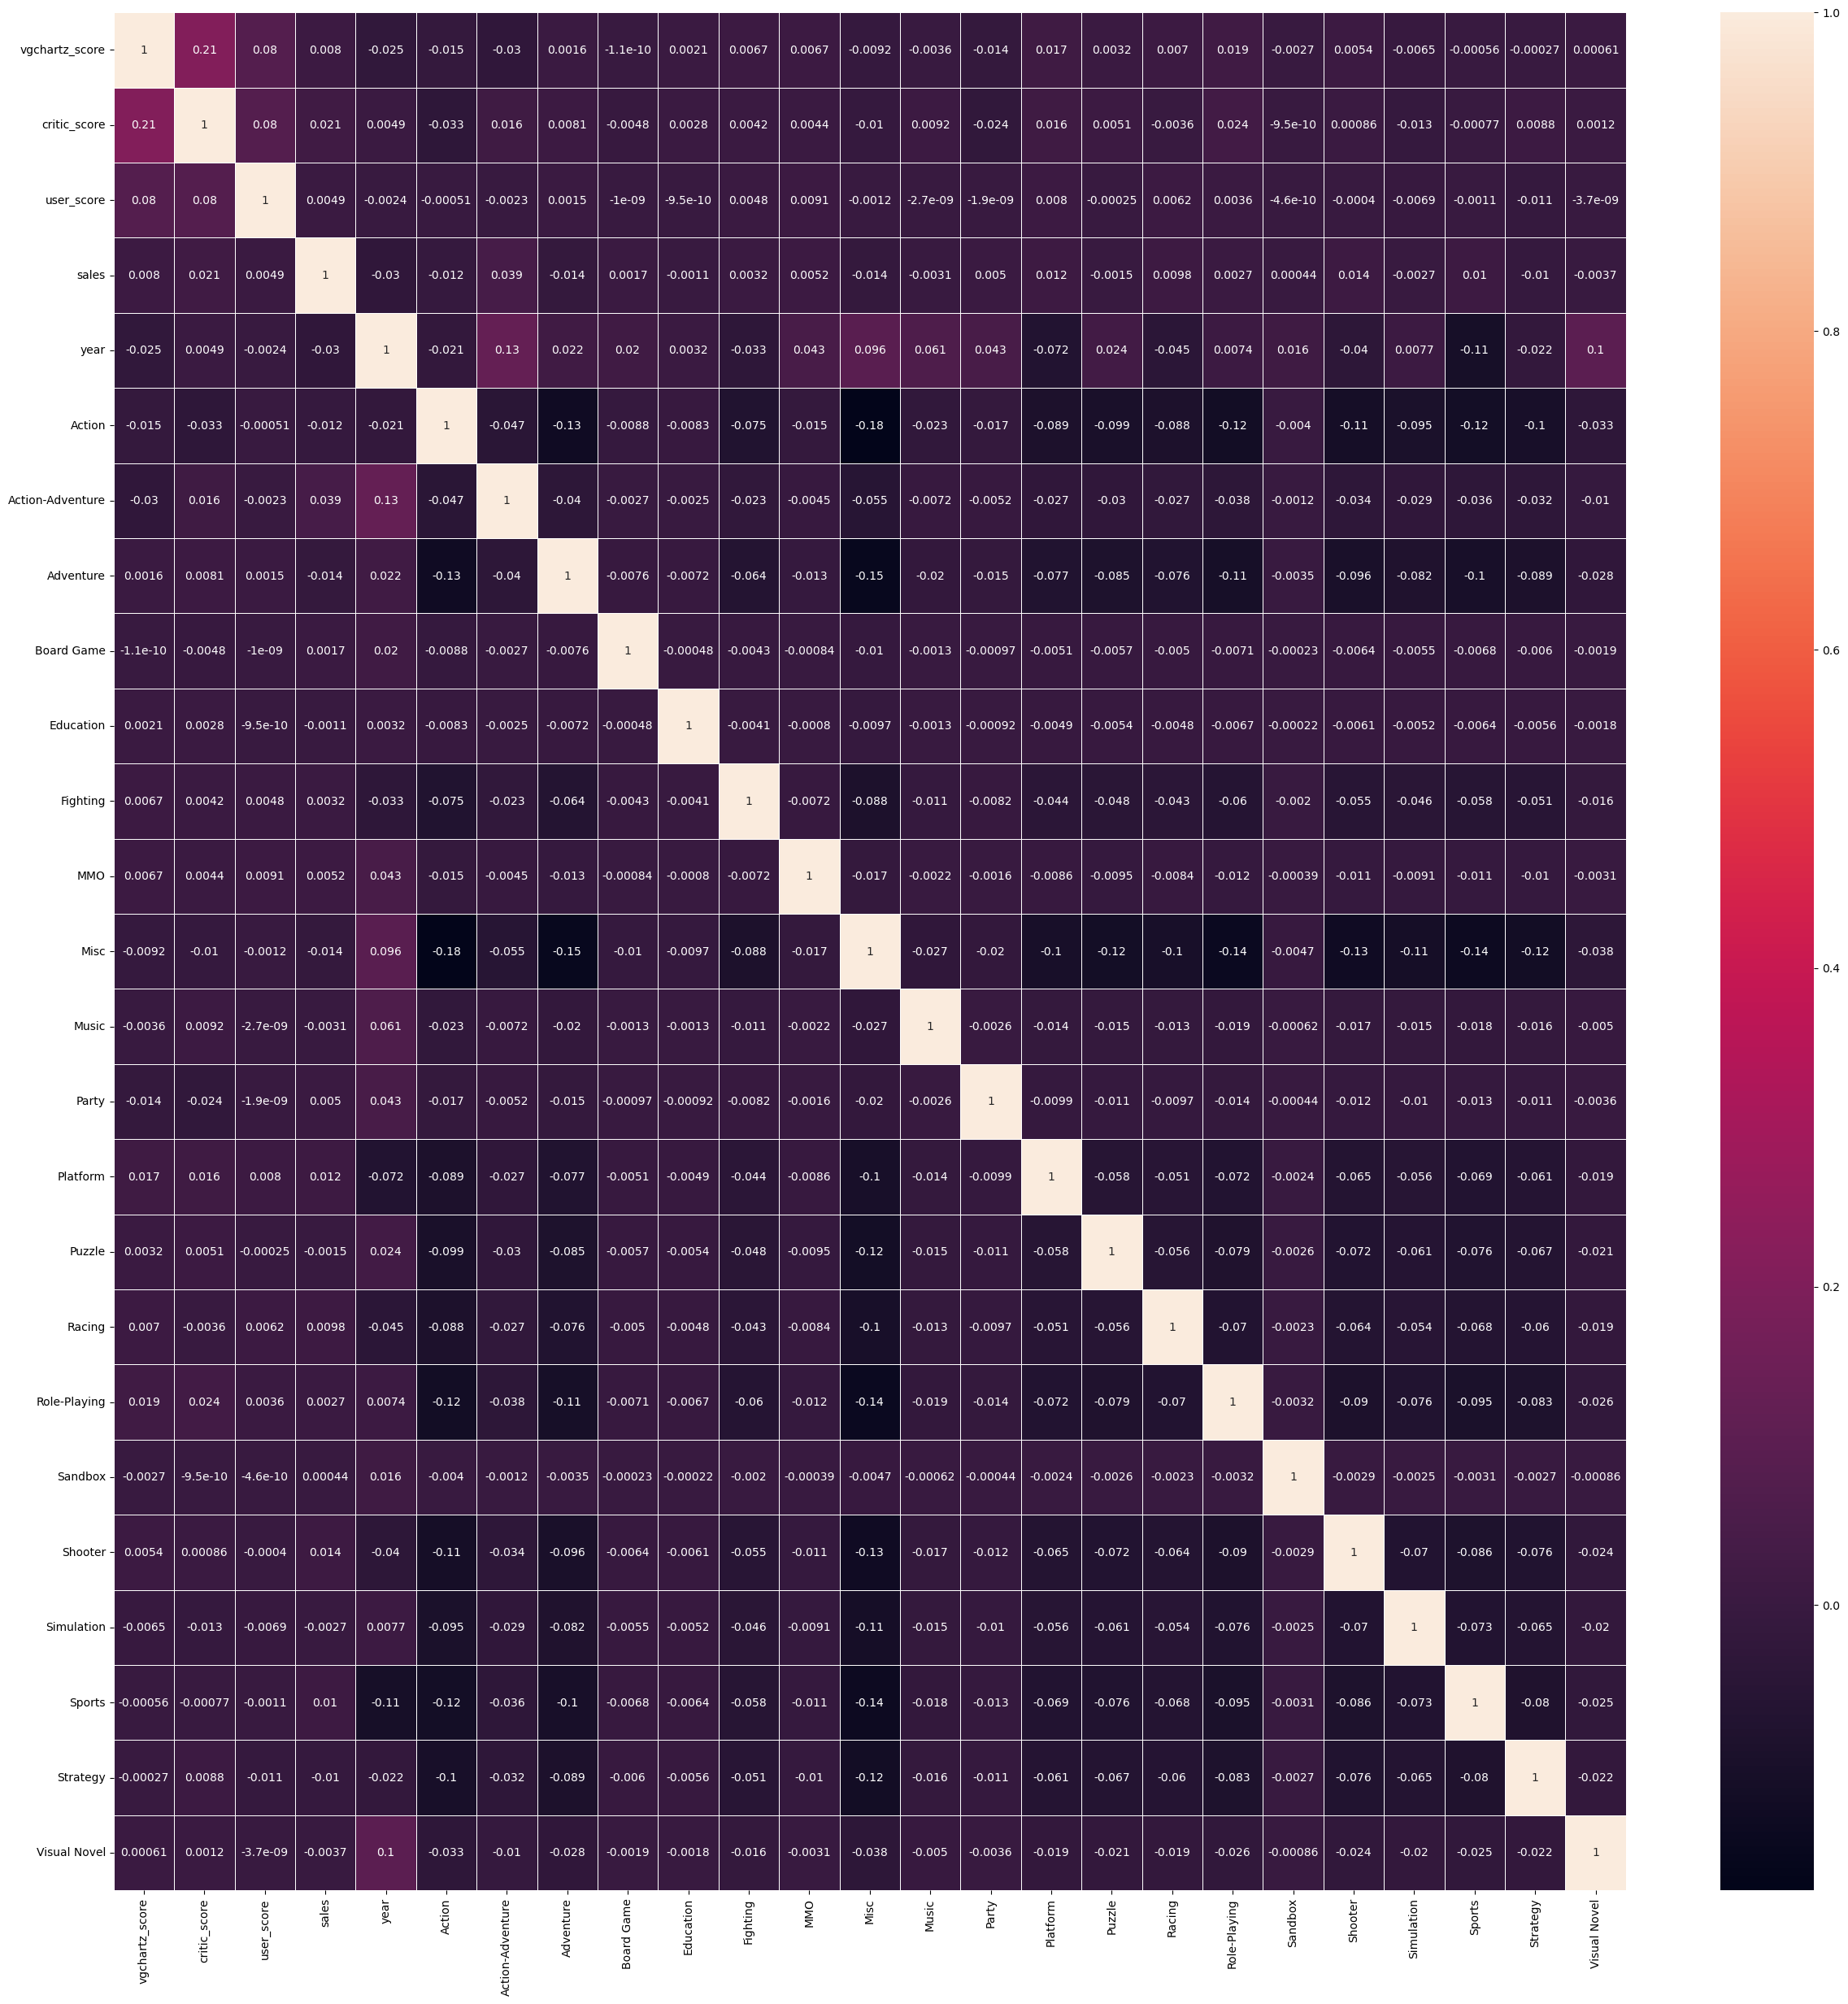

In [86]:
plt.figure(figsize = (30,30))
sns.heatmap(dfWithDummiesGen.corr(),annot=True,linewidths=.5)
plt.show()

Observación de las correlaciones más altas

In [77]:
dfWithDummiesGen.corr()['sales'].nlargest(10)

sales               1.000000
Action-Adventure    0.039137
critic_score        0.020653
Shooter             0.013989
Platform            0.011873
Sports              0.010272
Racing              0.009822
vgchartz_score      0.008035
MMO                 0.005180
Party               0.005004
Name: sales, dtype: float64

Observación de las correlaciones más bajas

In [78]:
dfWithDummiesGen.corr()['sales'].nsmallest(10)

year           -0.029879
Adventure      -0.014281
Misc           -0.014033
Action         -0.011719
Strategy       -0.010267
Visual Novel   -0.003685
Music          -0.003056
Simulation     -0.002706
Puzzle         -0.001521
Education      -0.001087
Name: sales, dtype: float64

## Df con dummies de publicadores

Dado a que este dataframe tiene demasiadas columnas dummies, decidimos filtrarlas para que solo tuviéramos las columnas con las mayores correlaciones con sales

In [79]:
# Creamos un nuevo df solo con los dummies de publisher
publisher_dummies = pd.get_dummies(df['publisher'])

# Se calcula la correlación entre las columnas dummies y la variable target de 'sales'
corr_for_Publisher = dfWithDummiesPubli.corr()['sales'][publisher_dummies.columns]

# El valor de correlación del que vamos a filtrar
corr_to_filter = 0.01

# Sacamos las columnas con una correlación (en valor absoluto) mayor a 0.01
corr_filtered = corr_for_Publisher[abs(corr_for_Publisher)>corr_to_filter]

# Hacemos una lista de las columnas con correlación mayor a 0.01
columns_to_keep=corr_filtered.index.tolist()

# añadimos todas las columnas que queremos al nuevo df: df_dummies_filtered
df_dummies_filtered = dfWithDummiesPubli[columns_to_keep]

Observamos las columnas con una correlación mayor a 0.01, es decir, solo 19 de las 3231 columnas tienen una correlación mayor a 0.01 con nuestra variable target

In [80]:
df_dummies_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37670 entries, 0 to 37714
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Activision              37670 non-null  uint8
 1   Blizzard Entertainment  37670 non-null  uint8
 2   EA Sports               37670 non-null  uint8
 3   Electronic Arts         37670 non-null  uint8
 4   Infocom                 37670 non-null  uint8
 5   Koei Tecmo              37670 non-null  uint8
 6   Midway                  37670 non-null  uint8
 7   Mindscape               37670 non-null  uint8
 8   Mojang                  37670 non-null  uint8
 9   Nintendo                37670 non-null  uint8
 10  PUBG Corporation        37670 non-null  uint8
 11  Rockstar Games          37670 non-null  uint8
 12  Sierra Studios          37670 non-null  uint8
 13  Square                  37670 non-null  uint8
 14  Strategic Simulations   37670 non-null  uint8
 15  Team17             

Concatenamos el df_dummies_filtered con el df original para obtener nuestra variable target

In [81]:
df_dummies_filtered = pd.concat([df, df_dummies_filtered], axis=1)

## Heat map del df con variables dummies de publisher

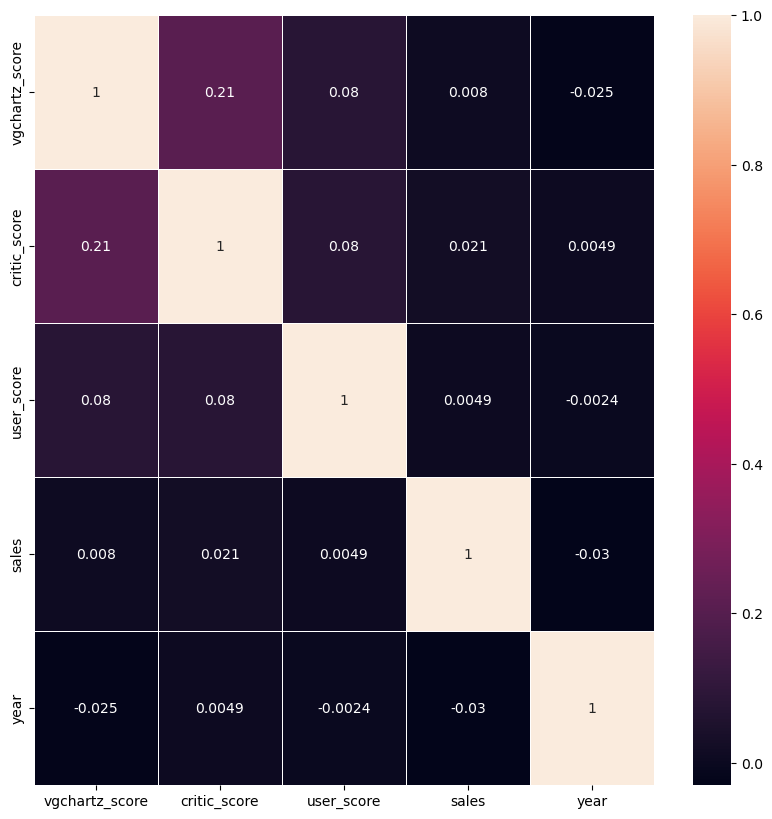

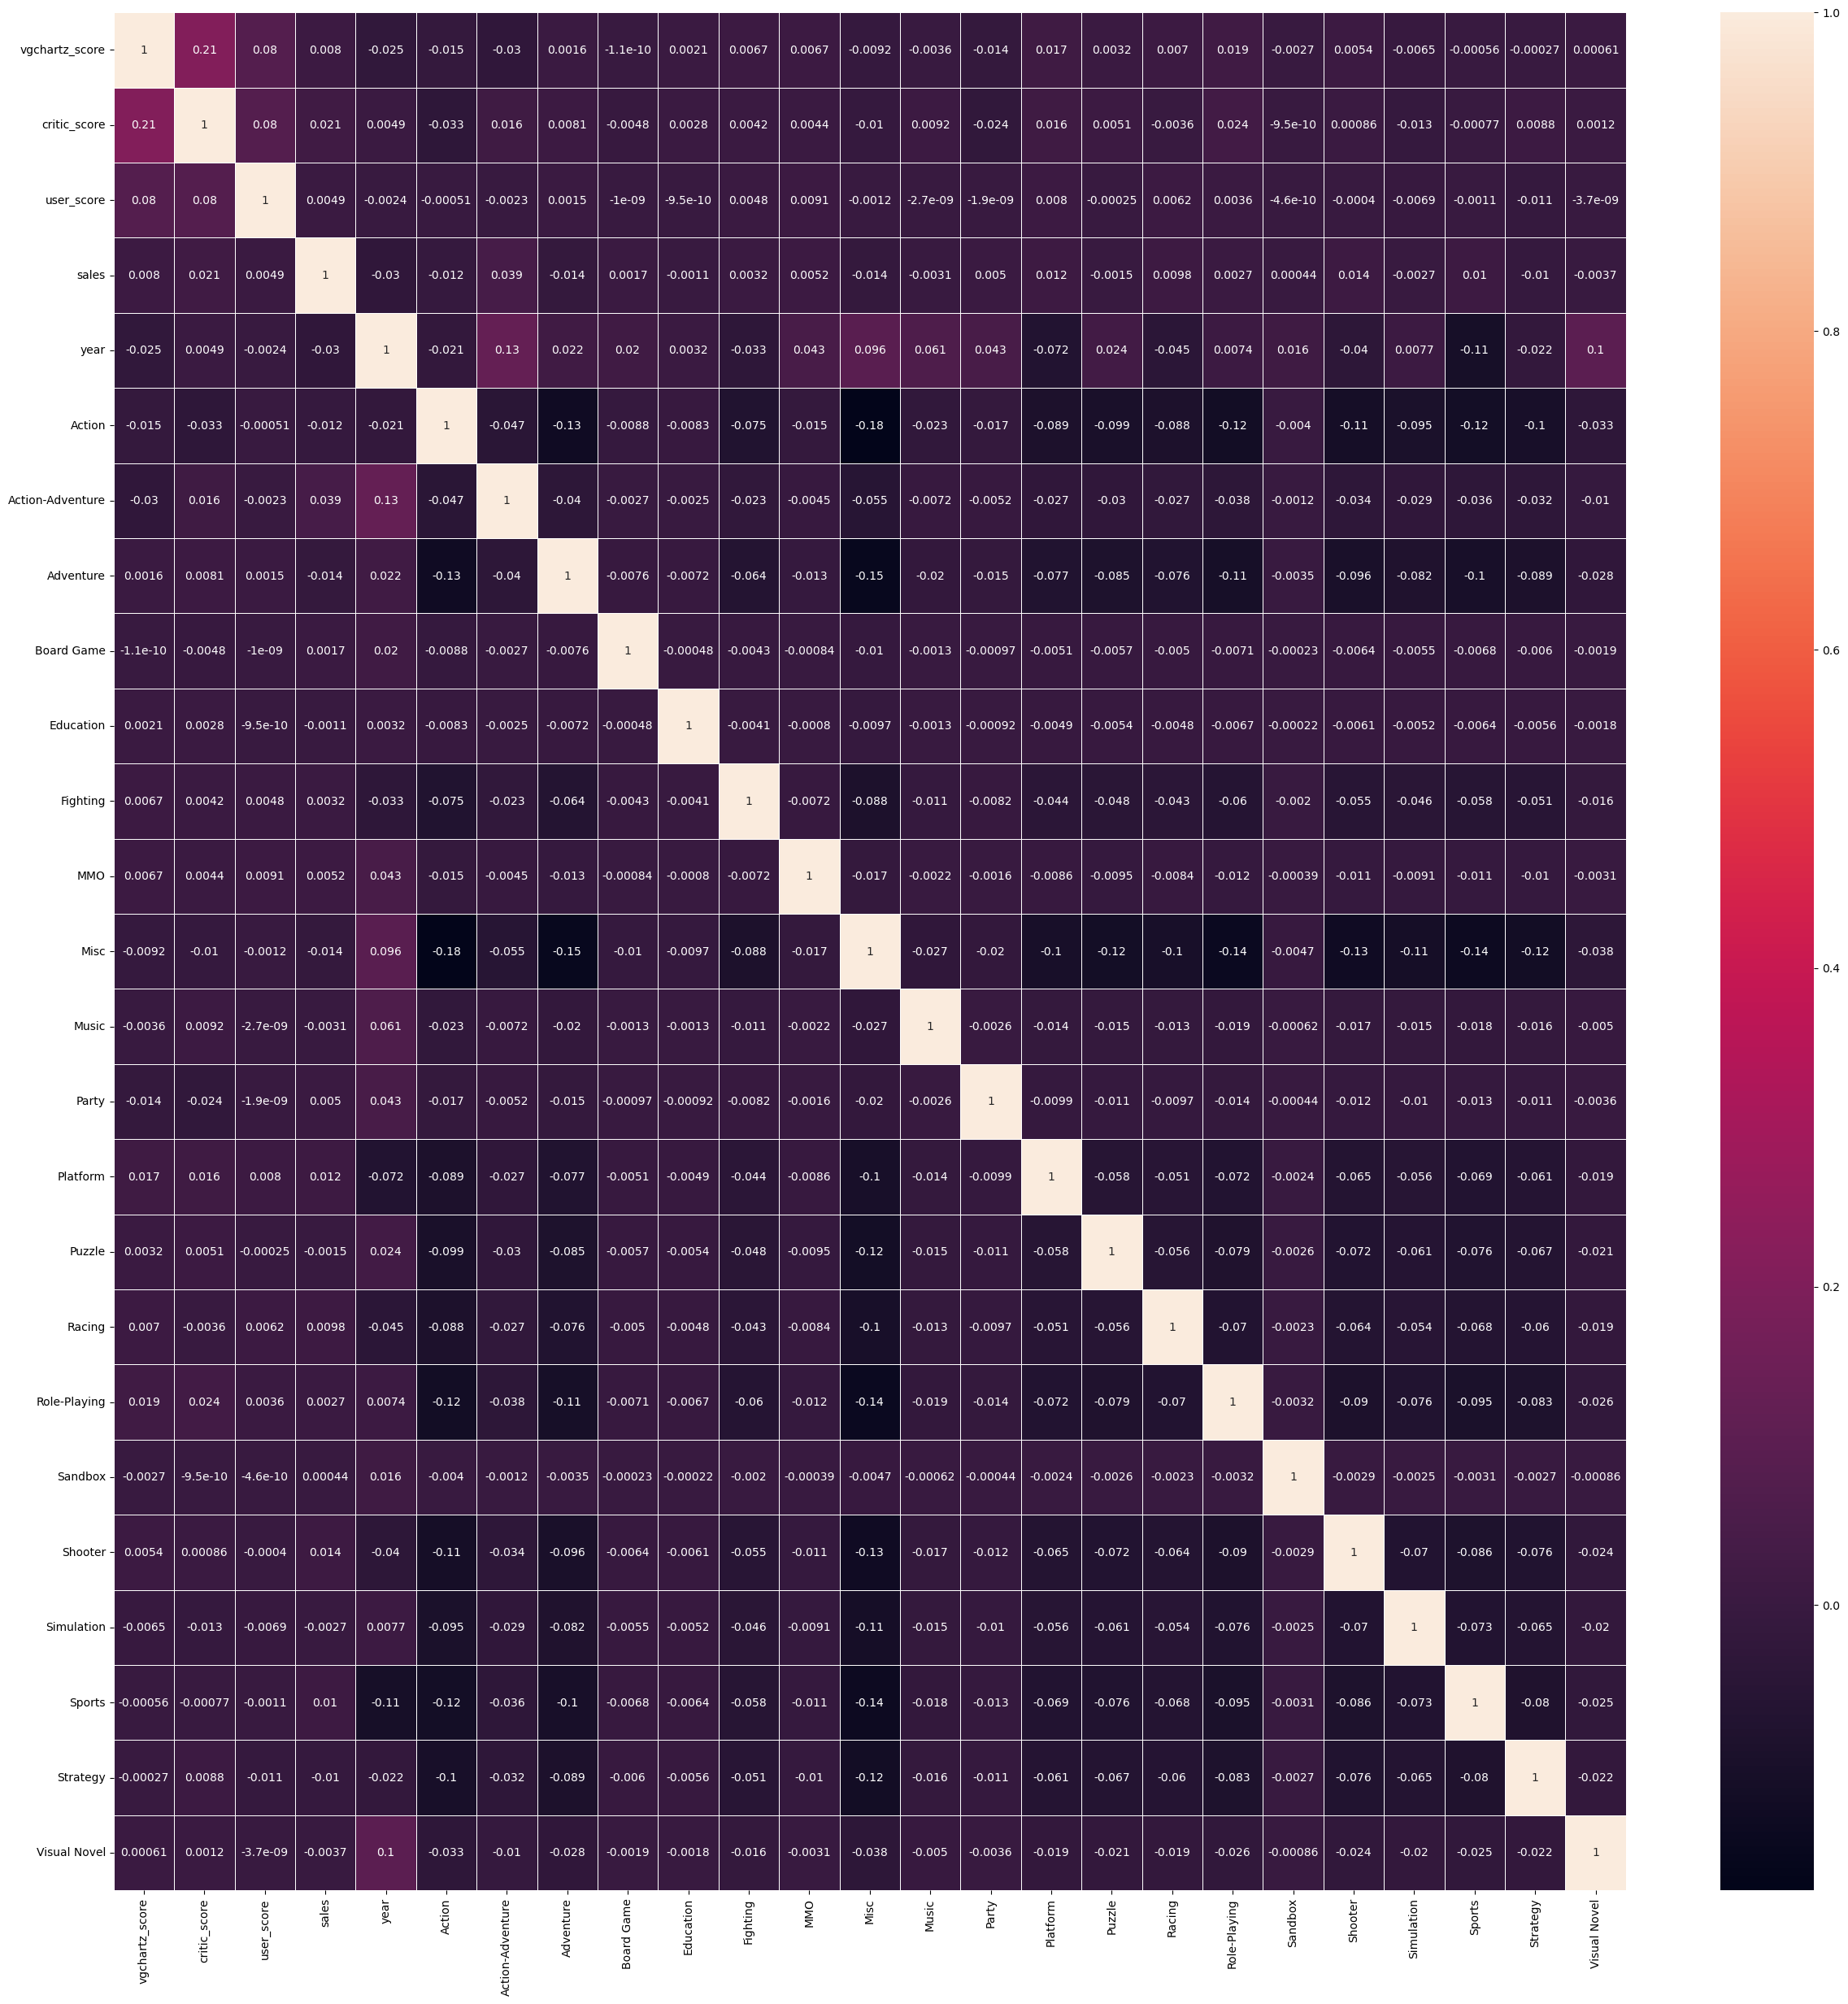

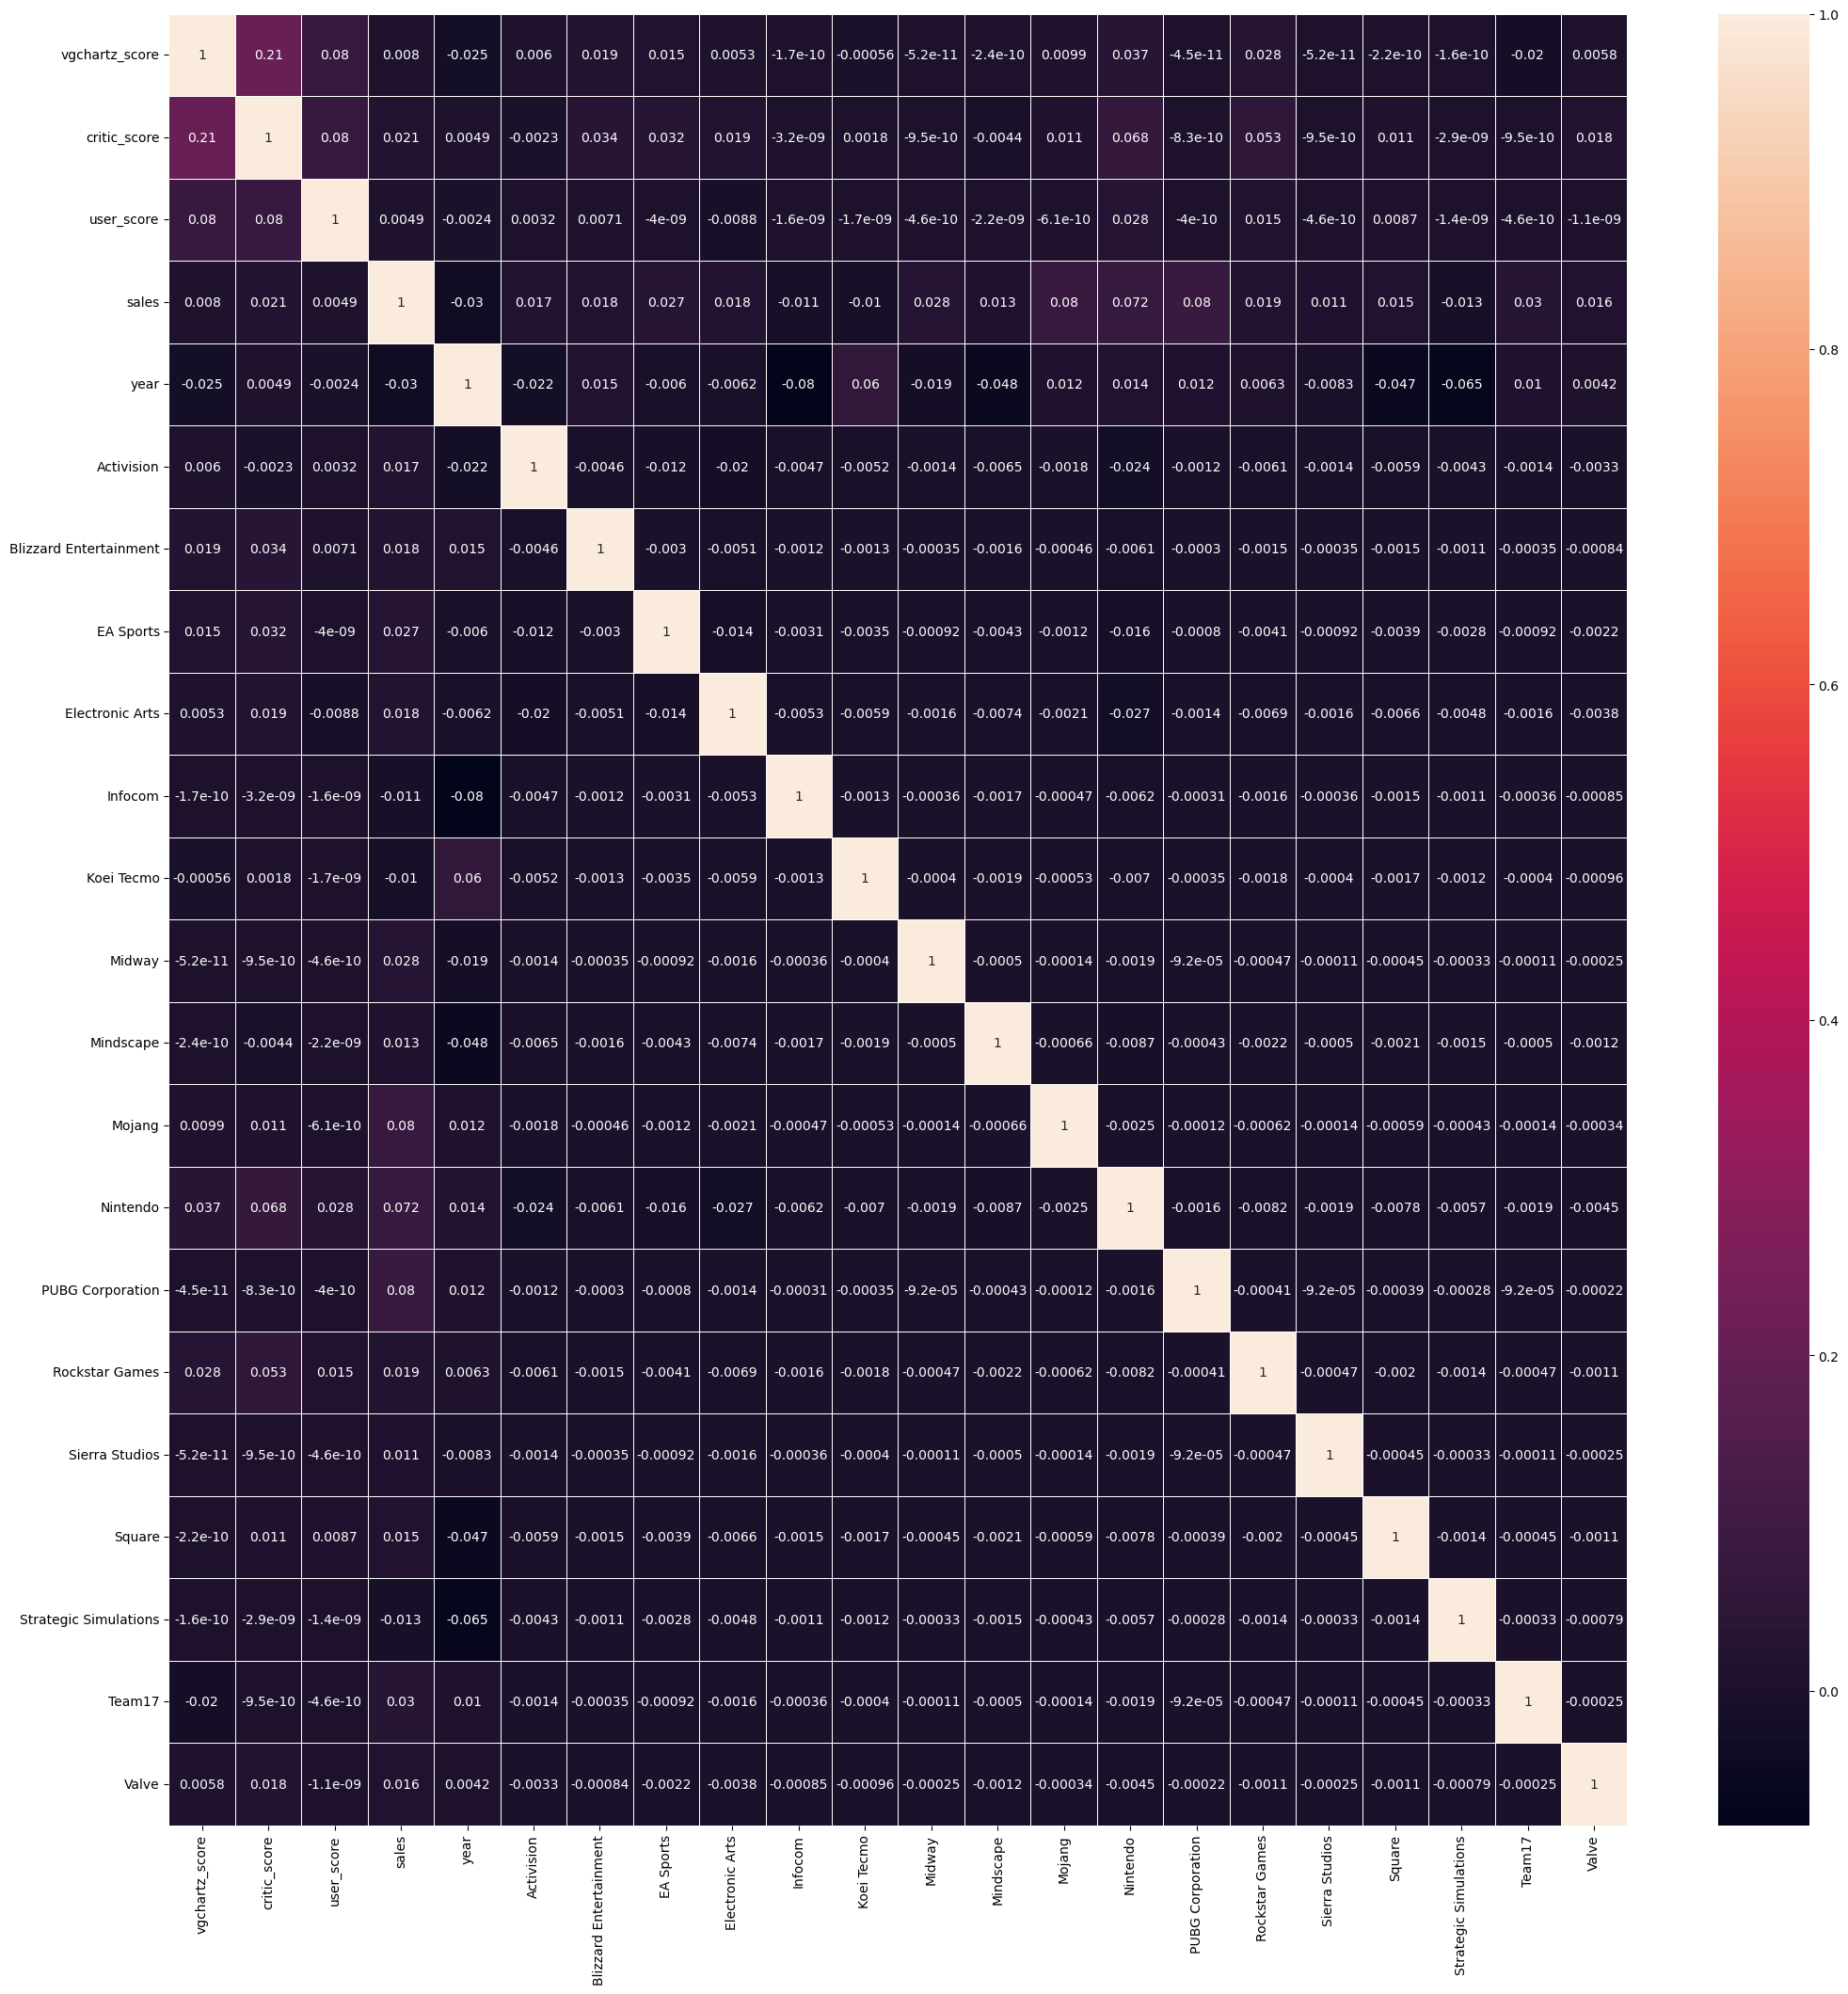

In [82]:
plt.figure(figsize = (25,25))
sns.heatmap(df_dummies_filtered.corr(),annot=True,linewidths=.5)
plt.show()

Observación de las correlaciones más altas

In [83]:
df_dummies_filtered.corr()['sales'].nlargest(10)

sales               1.000000
PUBG Corporation    0.080406
Mojang              0.080034
Nintendo            0.071918
Team17              0.029756
Midway              0.028293
EA Sports           0.026536
critic_score        0.020653
Rockstar Games      0.018717
Electronic Arts     0.018367
Name: sales, dtype: float64

Observación de las correlaciones más bajas

In [84]:
df_dummies_filtered.corr()['sales'].nsmallest(10)

year                    -0.029879
Strategic Simulations   -0.012527
Infocom                 -0.010693
Koei Tecmo              -0.010091
user_score               0.004943
vgchartz_score           0.008035
Sierra Studios           0.011052
Mindscape                0.012505
Square                   0.014658
Valve                    0.015526
Name: sales, dtype: float64